In [63]:
# overwriting notebook style
from IPython.display import display, HTML
display(HTML("<style>.jp-Cell { width: 80% !important; }</style>"))

# Import Modules

In [64]:
# import modules
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
from importlib import reload
import os
import math

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# global settings - global_settings.py

if 'global_settings' in dir():
    del global_settings

from global_settings import *
import global_settings
global_settings = reload(global_settings)

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# custom functions collection - functions.py

if 'functions' in dir():
    del functions

from functions import *
import functions
functions = reload(functions)

# Data Import

In [65]:
# os.chdir('../Data')
# os.getcwd()

data_file = '../Data/HR_Analytics.csv'

# read data
df = pd.read_csv(data_file)

In [66]:
df.head(8).T

0                     1  \
EmpID                                      RM297                 RM302   
Age                                           18                    18   
AgeGroup                                   18-25                 18-25   
Attrition                                    Yes                    No   
BusinessTravel                     Travel_Rarely         Travel_Rarely   
DailyRate                                    230                   812   
Department                Research & Development                 Sales   
DistanceFromHome                               3                    10   
Education                                      3                     3   
EducationField                     Life Sciences               Medical   
EmployeeCount                                  1                     1   
EmployeeNumber                               405                   411   
EnvironmentSatisfaction                        3                     4   
Gender                                      Male                Female   
HourlyRate                                    54                    69   
JobInvolvement                                 3                     2   
JobLevel                                       1                     1   
JobRole                    Laboratory Technician  Sales Representative   
JobSatisfaction                                3                     3   
MaritalStatus                             Single                Single   
MonthlyIncome                               1420                  1200   
SalarySlab                               Upto 5k               Upto 5k   
MonthlyRate                                25233                  9724   
NumCompaniesWorked                             1                     1   
Over18                                         Y                     Y   
OverTime                                      No                    No   
PercentSalaryHike                             13                    12   
PerformanceRating                              3                     3   
RelationshipSatisfaction                       3                     1   
StandardHours                                 80                    80   
StockOptionLevel                               0                     0   
TotalWorkingYears                              0                     0   
TrainingTimesLastYear                          2                     2   
WorkLifeBalance                                3                     3   
YearsAtCompany                                 0                     0   
YearsInCurrentRole                             0                     0   
YearsSinceLastPromotion                        0                     0   
YearsWithCurrManager                        0.00                  0.00   

                                             2                       3  \
EmpID                                    RM458                   RM728   
Age                                         18                      18   
AgeGroup                                 18-25                   18-25   
Attrition                                  Yes                      No   
BusinessTravel               Travel_Frequently              Non-Travel   
DailyRate                                 1306                     287   
Department                               Sales  Research & Development   
DistanceFromHome                             5                       5   
Education                                    3                       2   
EducationField                       Marketing           Life Sciences   
EmployeeCount                                1                       1   
EmployeeNumber                             614                    1012   
EnvironmentSatisfaction                      2                       2   
Gender                                    Male                    Male   
HourlyRate                                  69    

# Data Quality Check
- data types
- nan values
- unique values
- duplicates
- outliers

## Overview

In [67]:
# initial check - datatypes & NaN
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1480 non-null   object 
 1   Age                       1480 non-null   int64  
 2   AgeGroup                  1480 non-null   object 
 3   Attrition                 1480 non-null   object 
 4   BusinessTravel            1480 non-null   object 
 5   DailyRate                 1480 non-null   int64  
 6   Department                1480 non-null   object 
 7   DistanceFromHome          1480 non-null   int64  
 8   Education                 1480 non-null   int64  
 9   EducationField            1480 non-null   object 
 10  EmployeeCount             1480 non-null   int64  
 11  EmployeeNumber            1480 non-null   int64  
 12  EnvironmentSatisfaction   1480 non-null   int64  
 13  Gender                    1480 non-null   object 
 14  HourlyRa

## Missing Values

In [68]:
df.isna().sum()

EmpID                        0
Age                          0
AgeGroup                     0
Attrition                    0
BusinessTravel               0
DailyRate                    0
Department                   0
DistanceFromHome             0
Education                    0
EducationField               0
EmployeeCount                0
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
SalarySlab                   0
MonthlyRate                  0
NumCompaniesWorked           0
Over18                       0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours                0
StockOptionLevel             0
TotalWorkingYears            0
Training

In [69]:
# zoom-in into 'YearsWithCurrManager' (NaNs)

for nan_column in ['YearsWithCurrManager']:
    mask = df.loc[:,nan_column].isna() == True
    #for nan_value_idx in df.loc[mask, :].index.values:
        # df.loc[nan_value_idx, nan_column] = f_vehicleNanImputer(nan_value_idx, nan_column, df, False)
df.loc[mask, :].T

28                    31    \
EmpID                                      RM024                 RM363   
Age                                           21                    21   
AgeGroup                                   18-25                 18-25   
Attrition                                     No                    No   
BusinessTravel                     Travel_Rarely            Non-Travel   
DailyRate                                    391                   895   
Department                Research & Development                 Sales   
DistanceFromHome                              15                     9   
Education                                      2                     2   
EducationField                     Life Sciences               Medical   
EmployeeCount                                  1                     1   
EmployeeNumber                                30                   484   
EnvironmentSatisfaction                        3                     1   
Gender                                      Male                  Male   
HourlyRate                                    96                    39   
JobInvolvement                                 3                     3   
JobLevel                                       1                     1   
JobRole                       Research Scientist  Sales Representative   
JobSatisfaction                                4                     4   
MaritalStatus                             Single                Single   
MonthlyIncome                               1232                  2610   
SalarySlab                               Upto 5k               Upto 5k   
MonthlyRate                                19281                  2851   
NumCompaniesWorked                             1                     1   
Over18                                         Y                     Y   
OverTime                                      No                    No   
PercentSalaryHike                             14                    24   
PerformanceRating                              3                     4   
RelationshipSatisfaction                       4                     3   
StandardHours                                 80                    80   
StockOptionLevel                               0                     0   
TotalWorkingYears                              0                     3   
TrainingTimesLastYear                          6                     3   
WorkLifeBalance                                3                     2   
YearsAtCompany                                 0                     3   
YearsInCurrentRole                             0                     2   
YearsSinceLastPromotion                        0                     2   
YearsWithCurrManager                         NaN                   NaN   

                                            45               99    \
EmpID                                      RM207            RM139   
Age                                           22               25   
AgeGroup                                   18-25            18-25   
Attrition                                     No               No   
BusinessTravel                     Travel_Rarely    Travel_Rarely   
DailyRate                                   1136              959   
Department                Research & Development            Sales   
DistanceFromHome                               5               28   
Education                                      3                3   
EducationField                     Life Sciences    Life Sciences   
EmployeeCount                                  1                1   
EmployeeNumber                               284              183   
EnvironmentSatisfaction                        4                1   
Gender                                      Male             Male   
HourlyRate                                    60               41   
JobInvolvement                                 4     

## Unique Values and Duplicates

In [70]:
# check for unique values
print(df.nunique())

# to be dropped:
# 'EmployeeCount' (always: '1')
# 'Over18' (always: 'Y')
# 'StandardHours' - keep it as variable? (80)
# 

mask_single_value = list(df.nunique().index.values[df.nunique() == 1])

# remove columns
df = df.loc[:, ~df.columns.isin(mask_single_value)]

EmpID                       1470
Age                           43
AgeGroup                       5
Attrition                      2
BusinessTravel                 4
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
SalarySlab                     4
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptio

In [71]:
# check for duplicates
print('Duplicated observations: {}'.format(df.duplicated().sum()))

Duplicated observations: 7


In [72]:
# zoom-in into duplicates

mask_duplicates = df.duplicated() == True # keep=False
display(df.loc[mask_duplicates, :])

# remove duplicates
df = df.loc[~mask_duplicates, :]

EmpID  Age AgeGroup Attrition     BusinessTravel  DailyRate  \
211   RM1468   27    26-35        No      Travel_Rarely        155   
328   RM1461   29    26-35        No      Travel_Rarely        468   
458   RM1464   31    26-35        No         Non-Travel        325   
655   RM1470   34    26-35        No       TravelRarely        628   
954   RM1463   39    36-45        No      Travel_Rarely        722   
1305  RM1469   49    46-55        No  Travel_Frequently       1023   
1336  RM1462   50    46-55       Yes      Travel_Rarely        410   

                  Department  DistanceFromHome  Education EducationField  ...  \
211   Research & Development                 4          3  Life Sciences  ...   
328   Research & Development                28          4        Medical  ...   
458   Research & Development                 5          3        Medical  ...   
655   Research & Development                 8          3        Medical  ...   
954                    Sales                24          1      Marketing  ...   
1305                   Sales                 2          3        Medical  ...   
1336                   Sales                28          3      Marketing  ...   

      PerformanceRating  RelationshipSatisfaction StockOptionLevel  \
211                   4                         2                1   
328                   3                         2                0   
458                   3                         2                0   
655                   3                         1                0   
954                   3                         1                1   
1305                  3                         4                0   
1336                  3                         2                1   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
211                   6                      0                3   
328                   5                      3                1   
458                  10                      2                3   
655                   6                      3                4   
954                  21                      2                2   
1305                 17                      3                2   
1336                 20                      3                3   

     YearsAtCompany  YearsInCurrentRole YearsSinceLastPromotion  \
211               6                   2                       0   
328               5                   4                       0   
458               9                   4                       1   
655               4                   3                       1   
954              20                   9                       9   
1305              9                   6                       0   
1336              3                   2                       2   

      YearsWithCurrManager  
211                   3.00  
328                   4.00  
458                   7.00  
655                   2.00  
954                   6.00  
1305                  8.00  
1336                  0.00  

[7 rows x 35 columns]

In [73]:
df.describe().T

# 'StandardHours' - to be removed (std = 0)

count     mean     std     min     25%      50%  \
Age                      1473.00    36.92    9.13   18.00   30.00    36.00   
DailyRate                1473.00   802.66  403.25  102.00  465.00   802.00   
DistanceFromHome         1473.00     9.20    8.11    1.00    2.00     7.00   
Education                1473.00     2.91    1.02    1.00    2.00     3.00   
EmployeeNumber           1473.00  1026.98  603.22    1.00  492.00  1024.00   
EnvironmentSatisfaction  1473.00     2.72    1.09    1.00    2.00     3.00   
HourlyRate               1473.00    65.83   20.35   30.00   48.00    66.00   
JobInvolvement           1473.00     2.73    0.71    1.00    2.00     3.00   
JobLevel                 1473.00     2.06    1.11    1.00    1.00     2.00   
JobSatisfaction          1473.00     2.73    1.10    1.00    2.00     3.00   
MonthlyIncome            1473.00  6500.23 4706.05 1009.00 2911.00  4908.00   
MonthlyRate              1473.00 14321.38 7115.54 2094.00 8053.00 14242.00   
NumCompaniesWorked       1473.00     2.69    2.50    0.00    1.00     2.00   
PercentSalaryHike        1473.00    15.21    3.66   11.00   12.00    14.00   
PerformanceRating        1473.00     3.15    0.36    3.00    3.00     3.00   
RelationshipSatisfaction 1473.00     2.71    1.08    1.00    2.00     3.00   
StockOptionLevel         1473.00     0.79    0.85    0.00    0.00     1.00   
TotalWorkingYears        1473.00    11.28    7.78    0.00    6.00    10.00   
TrainingTimesLastYear    1473.00     2.80    1.29    0.00    2.00     3.00   
WorkLifeBalance          1473.00     2.76    0.71    1.00    2.00     3.00   
YearsAtCompany           1473.00     7.00    6.12    0.00    3.00     5.00   
YearsInCurrentRole       1473.00     4.23    3.62    0.00    2.00     3.00   
YearsSinceLastPromotion  1473.00     2.18    3.22    0.00    0.00     1.00   
YearsWithCurrManager     1416.00     4.12    3.56    0.00    2.00     3.00   

                              75%      max  
Age                         43.00    60.00  
DailyRate                 1157.00  1499.00  
DistanceFromHome            14.00    29.00  
Education                    4.00     5.00  
EmployeeNumber            1558.00  2068.00  
EnvironmentSatisfaction      4.00     4.00  
HourlyRate                  83.00   100.00  
JobInvolvement               3.00     4.00  
JobLevel                     3.00     5.00  
JobSatisfaction              4.00     4.00  
MonthlyIncome             8380.00 19999.00  
MonthlyRate              20467.00 26999.00  
NumCompaniesWorked           4.00     9.00  
PercentSalaryHike           18.00    25.00  
PerformanceRating            3.00     4.00  
RelationshipSatisfaction     4.00     4.00  
StockOptionLevel             1.00     3.00  
TotalWorkingYears           15.00    40.00  
TrainingTimesLastYear        3.00     6.00  
WorkLifeBalance              3.00     4.00  
YearsAtCompany               9.00    40.00  
YearsInCurrentRole           7.00    18.00  
YearsSinceLastPromotion      3.00    15.00  
YearsWithCurrManager         7.00    17.00

# Label Encoding

In [74]:
# data types conversion
cat_cols = ['EmpID', 'AgeGroup', 'BusinessTravel', 'Department', 'Education', 'EducationField', 'EmployeeNumber',
           'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
           'MaritalStatus', 'SalarySlab', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
           'WorkLifeBalance']
col_dtypes = {'EmpID': 'category',
              'AgeGroup': 'category',
              'BusinessTravel': 'category',
              'Department': 'category',
              'Education': 'category',
              'EducationField': 'category',
              'EmployeeNumber': 'category',
              'EnvironmentSatisfaction': 'category',
              'Gender': 'category',
              'JobInvolvement': 'category',
              'JobLevel': 'category',
              'JobRole': 'category',
              'JobSatisfaction': 'category',
              'MaritalStatus': 'category',
              'SalarySlab': 'category',
              'OverTime': 'category',
              'PerformanceRating': 'category',
              'RelationshipSatisfaction': 'category',
              'StockOptionLevel': 'category',
              'WorkLifeBalance': 'category'
             }

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# exclude columns from the summary

columns_excl_summary = []

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

for key in col_dtypes:
    # df[key] = df[key].astype(col_dtypes[key])   # < - - - data types conversion
    if key not in columns_excl_summary:
        print(df.loc[:, key].unique())
        print(df.loc[:, key].value_counts())
        f_divline()

['RM297' 'RM302' 'RM458' ... 'RM537' 'RM880' 'RM1210']
RM1467    2
RM1466    2
RM1465    2
RM297     1
RM958     1
         ..
RM757     1
RM693     1
RM683     1
RM657     1
RM1210    1
Name: EmpID, Length: 1470, dtype: int64

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

['18-25' '26-35' '36-45' '46-55' '55+']
26-35    607
36-45    470
46-55    226
18-25    123
55+       47
Name: AgeGroup, dtype: int64

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

['Travel_Rarely' 'Travel_Frequently' 'Non-Travel' 'TravelRarely']
Travel_Rarely        1038
Travel_Frequently     278
Non-Travel            150
TravelRarely            7
Name: BusinessTravel, dtype: int64

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

['Research & Development' 'Sales' 'Human Resources']
Research & Development    963
Sales                     447
Human Resources            63
Name: Department, dtype: int64

- - - - - 

In [75]:
mask = (df.loc[:,'EmployeeNumber'] == 2060) | (df.loc[:,'EmployeeNumber'] == 2061) | (df.loc[:,'EmployeeNumber'] == 2062)
display(df.loc[mask, :].T)

# drop 161, 803, 955
# drop 'EmployeeNumber'

161                   162  \
EmpID                                   RM1465                RM1465   
Age                                         26                    26   
AgeGroup                                 26-35                 26-35   
Attrition                                   No                    No   
BusinessTravel                   Travel_Rarely         Travel_Rarely   
DailyRate                                 1167                  1167   
Department                               Sales                 Sales   
DistanceFromHome                             5                     5   
Education                                    3                     3   
EducationField                           Other                 Other   
EmployeeNumber                            2060                  2060   
EnvironmentSatisfaction                      4                     4   
Gender                                  Female                Female   
HourlyRate                                  30                    30   
JobInvolvement                               2                     2   
JobLevel                                     1                     1   
JobRole                   Sales Representative  Sales Representative   
JobSatisfaction                              3                     3   
MaritalStatus                           Single                Single   
MonthlyIncome                             2966                  2966   
SalarySlab                             Upto 5k               Upto 5k   
MonthlyRate                              21378                 21378   
NumCompaniesWorked                           0                     0   
OverTime                                    No                    No   
PercentSalaryHike                           18                    18   
PerformanceRating                            3                     3   
RelationshipSatisfaction                     4                     4   
StockOptionLevel                             0                     0   
TotalWorkingYears                            5                     5   
TrainingTimesLastYear                        2                     2   
WorkLifeBalance                              3                     3   
YearsAtCompany                               4                     4   
YearsInCurrentRole                           2                     2   
YearsSinceLastPromotion                      0                     0   
YearsWithCurrManager                      0.00                  5.00   

                                             802                     803  \
EmpID                                     RM1466                  RM1466   
Age                                           36                      36   
AgeGroup                                   36-45                   36-45   
Attrition                                     No                      No   
BusinessTravel                 Travel_Frequently       Travel_Frequently   
DailyRate                                    884                     884   
Department                Research & Development  Research & Development   
DistanceFromHome                              23                      23   
Education                                      2                       2   
EducationField                           Medical                 Medical   
EmployeeNumber                              2061                    2061   
EnvironmentSatisfaction                        3                       3   
Gender                                      Male                    Male   
HourlyRate                                    41                      41   
JobInvolvement                                 4                       4   
JobLevel                                       2                       2   
JobRole                    Laboratory Technician   Laboratory Technician   
JobSatisfaction                                4                       4   
Marita

In [76]:
# print(df.loc[:, 'EmpID'].unique())
print(df.loc[:, 'EmpID'].value_counts())

RM1467    2
RM1466    2
RM1465    2
RM297     1
RM958     1
         ..
RM757     1
RM693     1
RM683     1
RM657     1
RM1210    1
Name: EmpID, Length: 1470, dtype: int64


In [77]:
# dropping duplicated 'EmployeeNumber': (idx) 161, 803, 955
for dupl_idx in [162, 802, 955]:
    if dupl_idx in df.index.values:
        df = df.drop(dupl_idx, axis=0)

# dropping useless columns
useless_cols = ['EmployeeNumber']
for column in useless_cols:
    if column in df.columns.values:
        df = df.drop(column, axis=1)

In [78]:
print(df.loc[:, 'EmpID'].value_counts())

RM297     1
RM1095    1
RM1046    1
RM1041    1
RM1030    1
         ..
RM693     1
RM683     1
RM657     1
RM642     1
RM1210    1
Name: EmpID, Length: 1470, dtype: int64


In [86]:
# categ. - label encoding

df['AgeGroup'].replace({'18-25': 0,
                        '26-35': 1,
                        '36-45': 2,
                        '46-55': 3,
                        '55+': 4
                       }, inplace=True)
df['Attrition'].replace({'Yes': 1, 'No': 0}, inplace=True)
df['BusinessTravel'].replace({'Non-Travel': 0,
                              'Travel_Rarely': 1,
                              'TravelRarely': 1,
                              'Travel_Frequently': 2
                             }, inplace=True)
df['Gender'].replace({'Male': 1, 'Female': 0}, inplace=True)
df['MaritalStatus'].replace({'Single': 0,
                             'Divorced': 1,
                             'Married': 2
                            }, inplace=True)
df['SalarySlab'].replace({'Upto 5k': 0,
                          '5k-10k': 1,
                          '10k-15k': 2,
                          '15k+': 3}, inplace=True)
df['OverTime'].replace({'Yes': 1, 'No': 0}, inplace=True)
df['PerformanceRating'].replace({3: 1, 4: 2}, inplace=True)

## Columns Reordering

In [80]:
# create columns order, so 'Attrition' is the last one
cols = df.columns.tolist()
cols_order = cols[:3] + cols[4:] + [cols[3]]

In [81]:
# reorder columns
df = df[cols_order]

## Temp fillna

In [82]:
# temp - fillna with median
df = df.fillna(value={'YearsWithCurrManager': df.loc[:,'YearsWithCurrManager'].median()})

## Quick check

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1479
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1470 non-null   object 
 1   Age                       1470 non-null   int64  
 2   AgeGroup                  1470 non-null   int64  
 3   BusinessTravel            1470 non-null   int64  
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EnvironmentSatisfaction   1470 non-null   int64  
 10  Gender                    1470 non-null   int64  
 11  HourlyRate                1470 non-null   int64  
 12  JobInvolvement            1470 non-null   int64  
 13  JobLevel                  1470 non-null   int64  
 14  JobRole 

## Target Classes distribution

0    1233
1     237
Name: Attrition, dtype: int64

Employees who left (percentage): 16.12%

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 



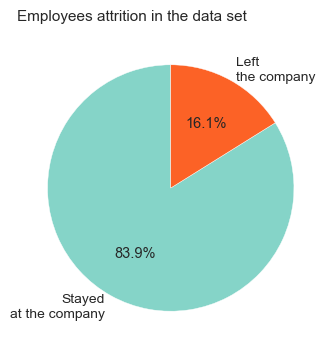

In [87]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# target classes distribution

display(df.loc[:, 'Attrition'].value_counts())
Attrition_count = df.loc[:, 'Attrition'].value_counts()
# print('\nEmployees who left: \033[1m{}\033[0m'.format(Attrition_count[1]))
print('Employees who left (percentage): \033[1m{:.2%}\033[0m'.format(Attrition_count[1] / Attrition_count.sum()))
f_divline(True,True)

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# vizualization global params

plt.rc('font', size=10.5)
plt.rc('axes', titlesize=11)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# vizualization

fig, ax = plt.subplots(figsize=[4,4])

Attrition_count.plot(kind='pie', y='count', legend=False,
                     labels=['Stayed\nat the company', 'Left\nthe company'],
                     colors=[color_palette[0], color_palette[1]],
                     startangle=90, autopct='%1.1f%%', ax=ax);

ax.set(title='Employees attrition in the data set',
      ylabel='')

ax.set_aspect('equal')

#### `Target classes are` **`unbalanced`**

## Data distribution

### Continuous features:

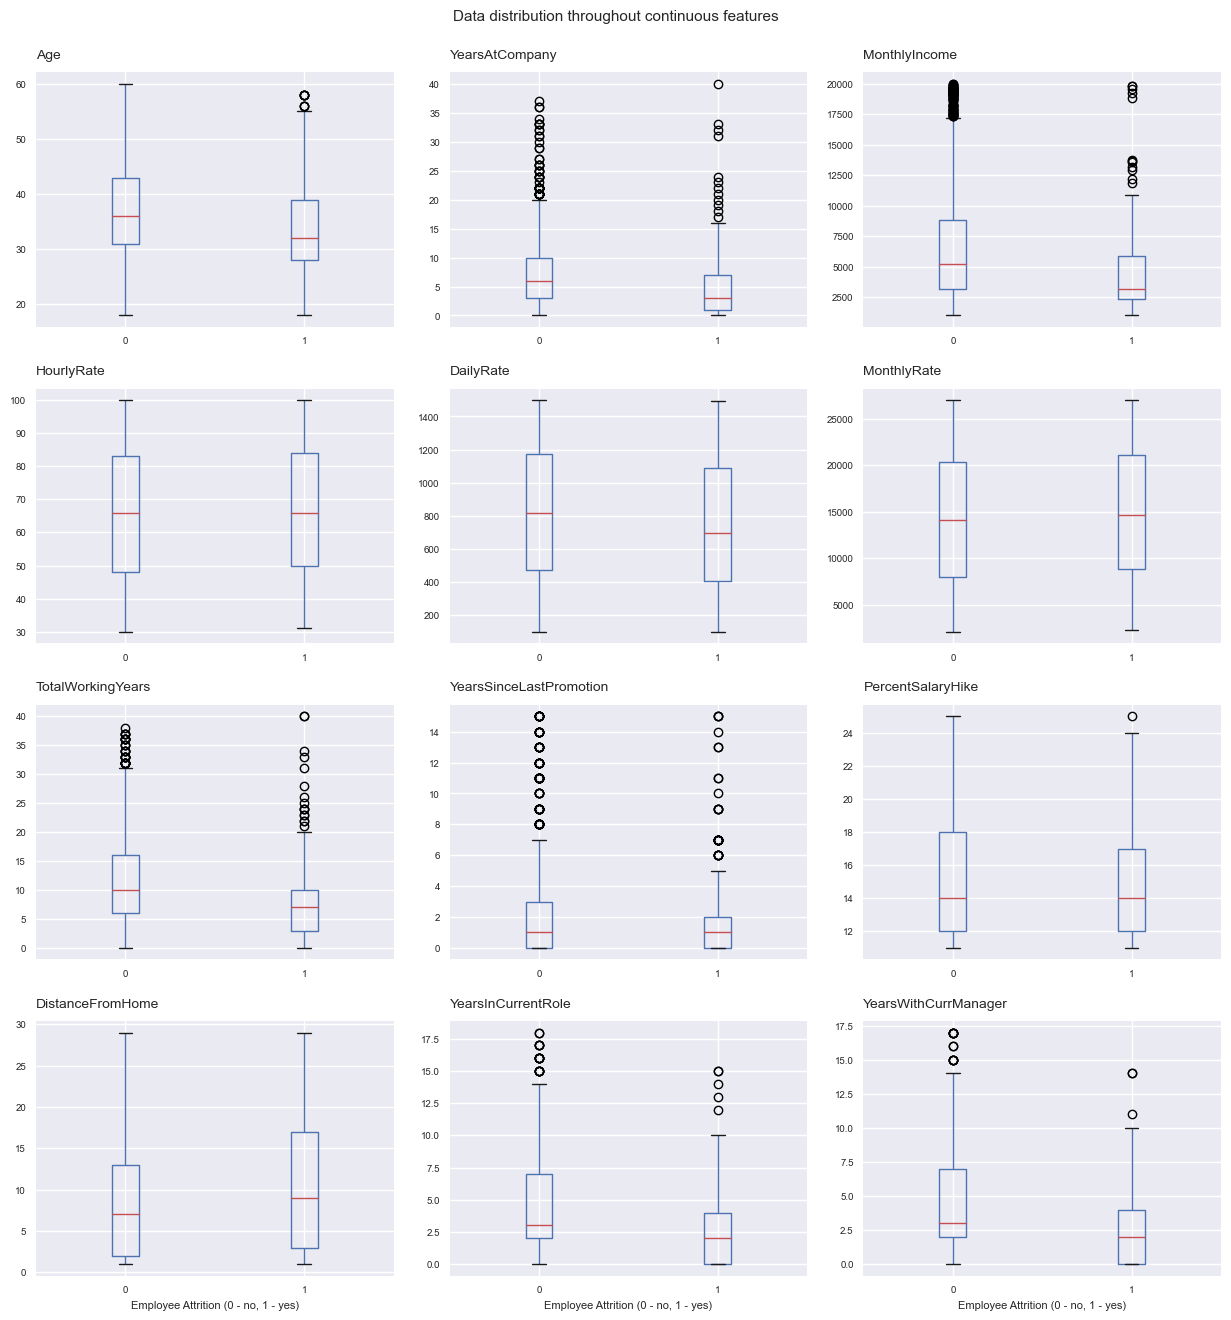

In [101]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# suppress warnings
import warnings
import matplotlib.cbook
warnings.filterwarnings('ignore', category=UserWarning)

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# vis style

plt.style.use('seaborn-v0_8')

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# visualization params - font sizes

plt.rc('font', size=12)
plt.rc('axes', titlesize=10, labelsize=8, titlepad=10)
plt.rc('xtick', labelsize=7)
plt.rc('ytick', labelsize=7)
plt.rc('figure', titlesize=11)

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# columns selection

focused_cols = ['Age', 'YearsAtCompany', 'MonthlyIncome',
                'HourlyRate', 'DailyRate', 'MonthlyRate',
                'TotalWorkingYears', 'YearsSinceLastPromotion','PercentSalaryHike',
                'DistanceFromHome', 'YearsInCurrentRole',  'YearsWithCurrManager', ] #'Attrition'

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# vizualization params

fig_cols = 3
fig_rows = math.ceil(len(focused_cols)/fig_cols)
fig_width = 12.5
fig_ax_wh_ratio = 0.8  # 1 - square, <1 - horizontal, >1 - vertical
fig_graph_pad_incr = -3  # incr. padding between axes; <0 - decreases
fig_suptitle_posY = 0.99

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# plotting

fig_data_distribution, ax = plt.subplots(nrows=fig_rows, ncols=fig_cols, figsize=[fig_width,((fig_rows/fig_cols)*fig_width)*fig_ax_wh_ratio])

for i in range(len(focused_cols)):
    #ax[i%fig_rows][i//fig_rows].cla() # clears the axe
    ax[i//fig_cols][i%fig_cols].cla() # clears the axe
    df.boxplot(column=focused_cols[i], by='Attrition', ax=ax[i//fig_cols][i%fig_cols]) # drawing order (row after row): [i//fig_cols][i%fig_cols]
                                                                                       # (col after col): [i%fig_rows][i//fig_rows]

for ax_row in range(fig_rows):
    if ax_row == (fig_rows-1):
        for i in range(fig_cols):
            ax[ax_row][i].set(xlabel='Employee Attrition (0 - no, 1 - yes)', ylabel='') 
    else:
        for i in range(fig_cols):
            ax[ax_row][i].set(xlabel='', ylabel='')
        
    
fig_data_distribution.suptitle('Data distribution throughout continuous features', y=fig_suptitle_posY);
fig_data_distribution.tight_layout(pad=(fig_width/fig_cols)+fig_graph_pad_incr)

### Categorical features:

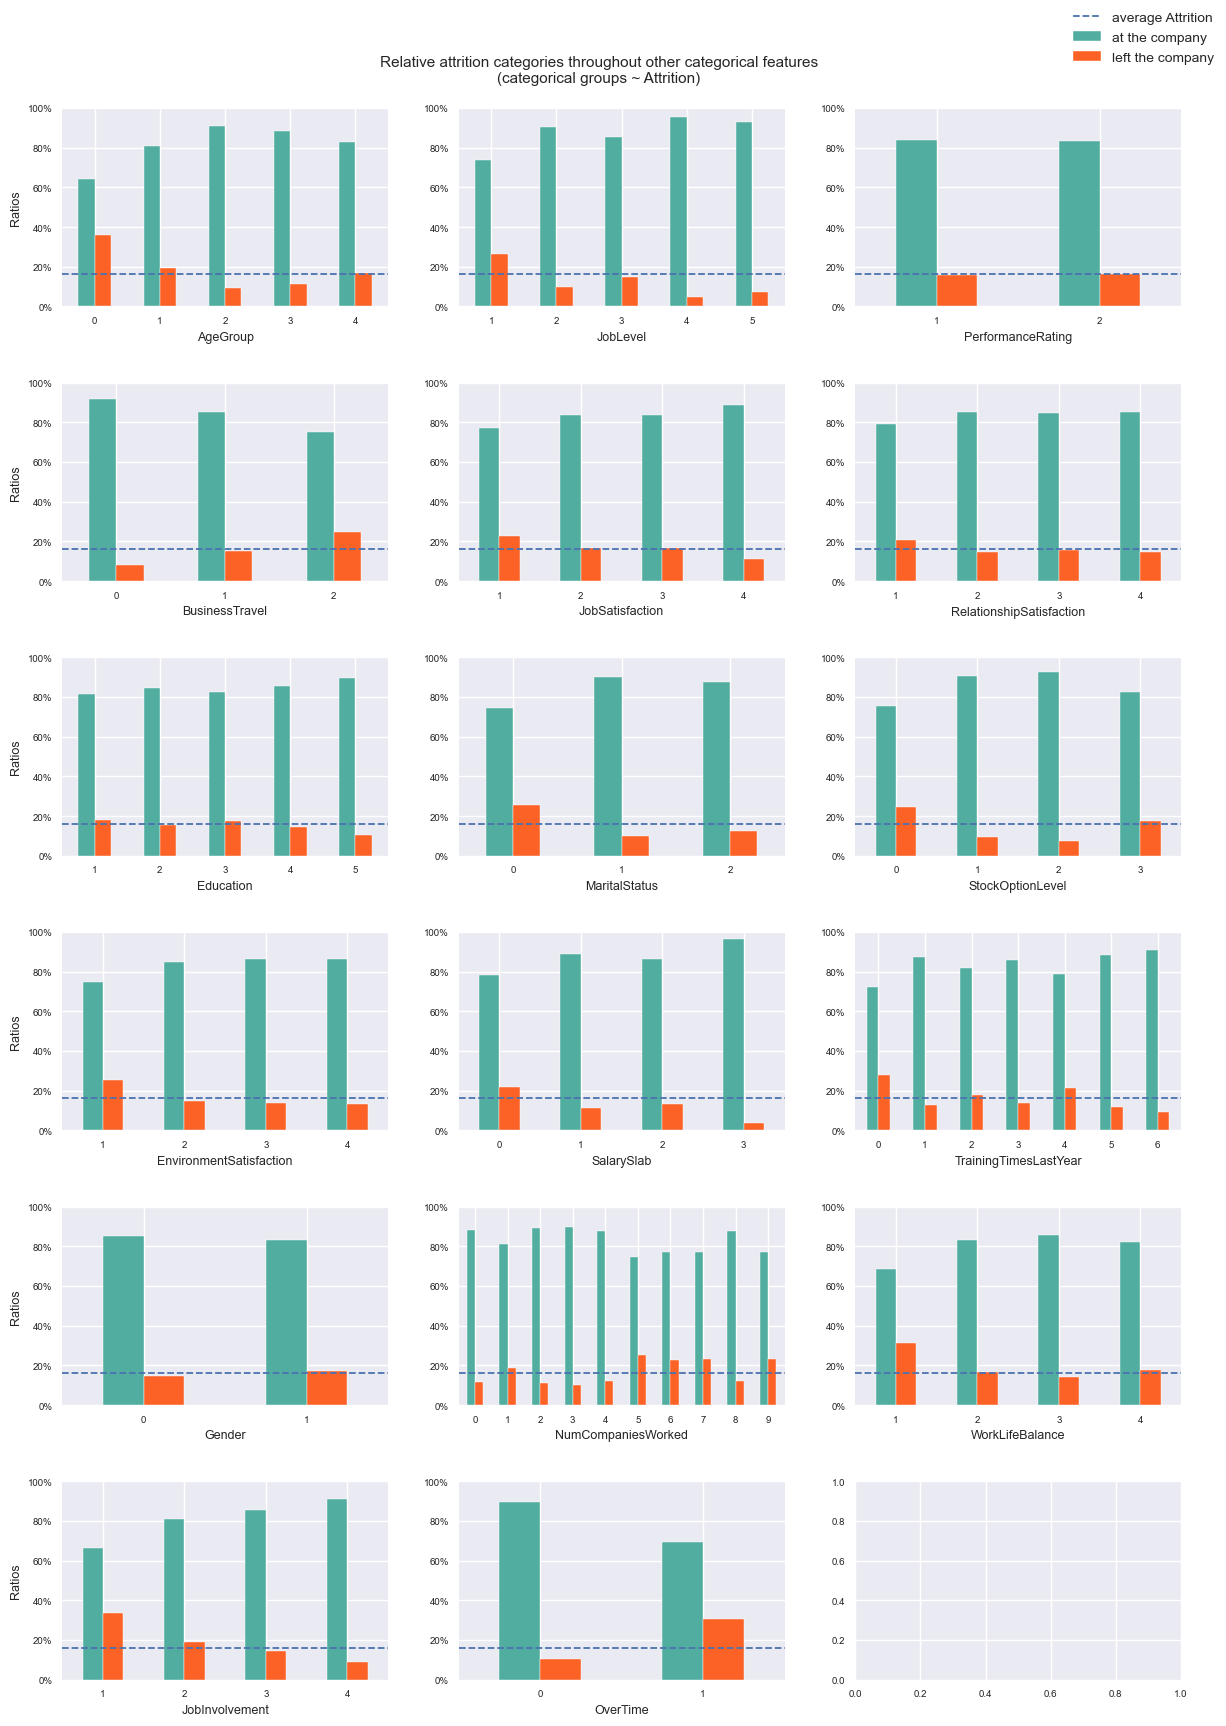

In [97]:
import matplotlib.ticker as ticker

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# visualization params - font sizes

plt.rc('axes', labelsize=9)

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# feature selection

focused_cols = ['AgeGroup','BusinessTravel', 'Education', 'EnvironmentSatisfaction','Gender', 'JobInvolvement',
             'JobLevel', 'JobSatisfaction', 'MaritalStatus', 'SalarySlab', 'NumCompaniesWorked', 'OverTime',
             'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
             'TrainingTimesLastYear', 'WorkLifeBalance']#'Attrition'

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# visualization setup

fig_cols = 3
fig_rows = math.ceil(len(focused_cols)/fig_cols)
fig_width = 12.5
fig_ax_wh_ratio = 0.7  # 1 - square, <1 - horizontal, >1 - vertical
fig_graph_pad_incr = -2  # incr. padding between axes; <0 - decreases
fig_suptitle_posY = 0.97

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# plotting

fig_data_distribution, ax = plt.subplots(nrows=fig_rows, ncols=fig_cols, figsize=[fig_width,((fig_rows/fig_cols)*fig_width)*fig_ax_wh_ratio])

attrition_mean = df['Attrition'].mean()

for i in range(len(focused_cols)):
    ax[i%fig_rows][i//fig_rows].cla() # clears the axe
    # ax[i//fig_cols][i%fig_cols].cla() # clears the axe
    
    # temp crosstab
    temp_ct = pd.crosstab(df.loc[:, focused_cols[i]], df.loc[:, 'Attrition'], normalize='index')\
    .sort_values(focused_cols[i], ascending=True).iloc[:20,:] # normalize='index'
    
    temp_ct.plot(kind='bar', title='', legend=False,
                 ax=ax[i%fig_rows][i//fig_rows], ylim=[0,1],
                 color=[sns_color_palette[0], sns_color_palette[1]]) 
                 # title='Employee attrition distribution across: {}'.format(focused_cols[i])
                 # - - - - - - - - - - -
                 # set the drawing order:
                 # (row after row): [i//fig_cols][i%fig_cols]
                 # (col after col): [i%fig_rows][i//fig_rows]
                
    ax[i%fig_rows][i//fig_rows].axhline(attrition_mean, label='Total average', ls='--', lw=1.3)
    #setup(ax[i%fig_rows][i//fig_rows], title="PercentFormatter(xmax=5)")
    ax[i%fig_rows][i//fig_rows].yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))

        
for ax_row in range(fig_rows):
    
    ax[ax_row][0].set(ylabel='Ratios') #ylabel='' #xlabel='', 
    
    if ax_row == (fig_rows-1):
        for i in range(fig_cols):
            # ax[ax_row][i].set(xlabel='Employee Attrition (green - no, red - yes)')
            ax[ax_row][i].set_xticklabels(ax[ax_row][i].get_xticklabels(), rotation=0)
    else:
        for i in range(fig_cols):
            
            ax[ax_row][i].set_xticklabels(ax[ax_row][i].get_xticklabels(), rotation=0)
        
    
fig_data_distribution.suptitle('Relative attrition categories throughout other categorical features\n(categorical groups ~ Attrition)',
                               y=fig_suptitle_posY)
fig_data_distribution.legend(['average Attrition', 'at the company', 'left the company'])
fig_data_distribution.tight_layout(pad=(fig_width/fig_cols)+fig_graph_pad_incr);

## Initial feature candidates for predictions:
### `Best:`
'Age', 'Overtime', 'MonthlyIncome', 'MaritalStatus' (?)


### Continuous:
`'Age'`, `'MonthlyIncome'`, 'TotalWorkingYears', 'YearsInCurrentRole', 'YearWithCurrManager'\
\
**Potentially:** 'YearsSinceLastPromotion'\
**Maybe:** 'DistanceFromHome', 'YearsAtCompany'

### Categorical:
'AgeGroup', `'Overtime'`, 'EnvironmentSatisfaction', 'BusinessTravel', 'JobLevel', `'MaritalStatus'`\
\
**Potentially:** 'SalarySlab', 'NumCompaniesWorked'

# Pairplot

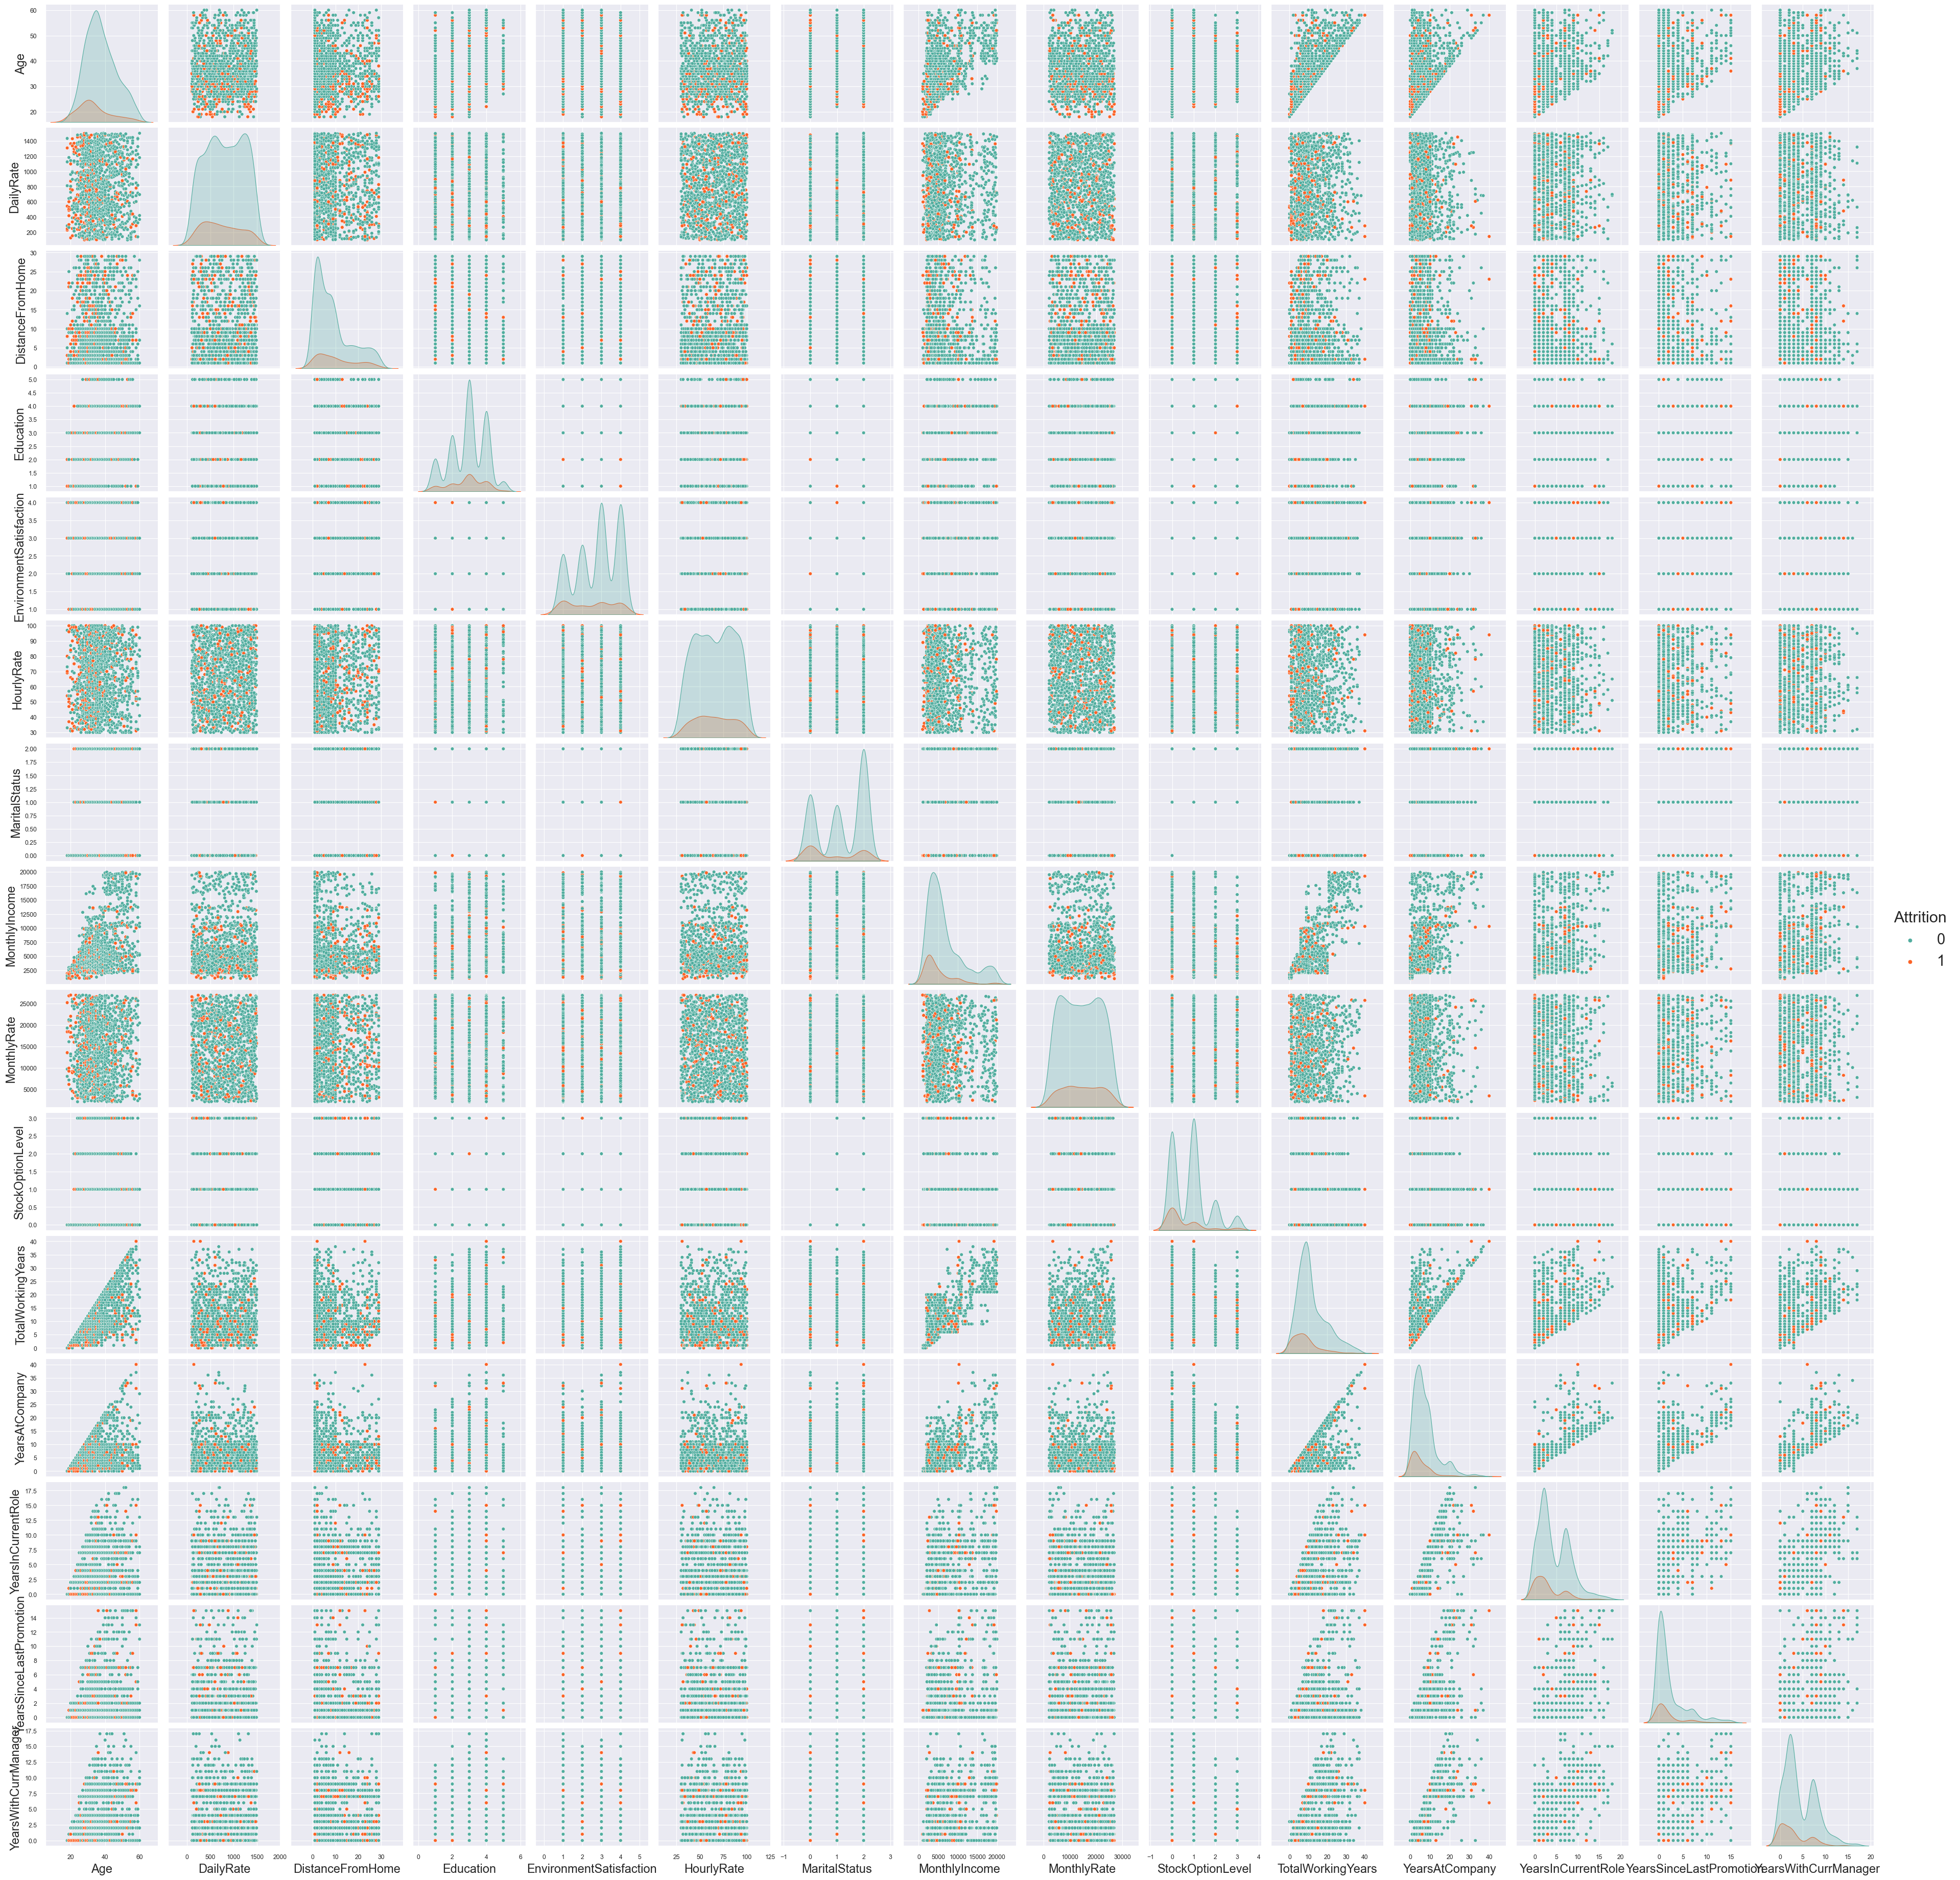

In [291]:
sns.set(font_scale=0.9)
sns.set_context('paper', rc={'axes.labelsize':17, 'legend.fontsize':21, 'legend.title_fontsize':22})

focused_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', # 'Gender',
                'HourlyRate', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'StockOptionLevel',
                'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
                'Attrition']

pairplot = sns.pairplot(df.loc[:, focused_cols], hue='Attrition', palette=sns_color_palette);

### Observations:
- in general strong clusterring in 'Attrition' (knn should yield promising results?)
- strong grouping in 'MonthlyIncome' ~ 'Age' (two groups with visible div. line - possibly regular employees and managers (?)) (SVM?)
- strong grouping in 'MonthlyIncome' ~ 'TotalWorkingYears' (same as above)
- visible div.line in 'MonthlyIncome' ~ 'MonthlyRate' (-||-)
- High attrition: 
    - 'Age': younger people
    - 'TotalWorkingYears', 'YearsAtCompany': lack of loyalty toward the company, ppl switching jobs more likely in the first 2-3 years
    - ? - 'DistanceFromHome': more attrition in close dist. (why? other companies nearby?)

# Correlations

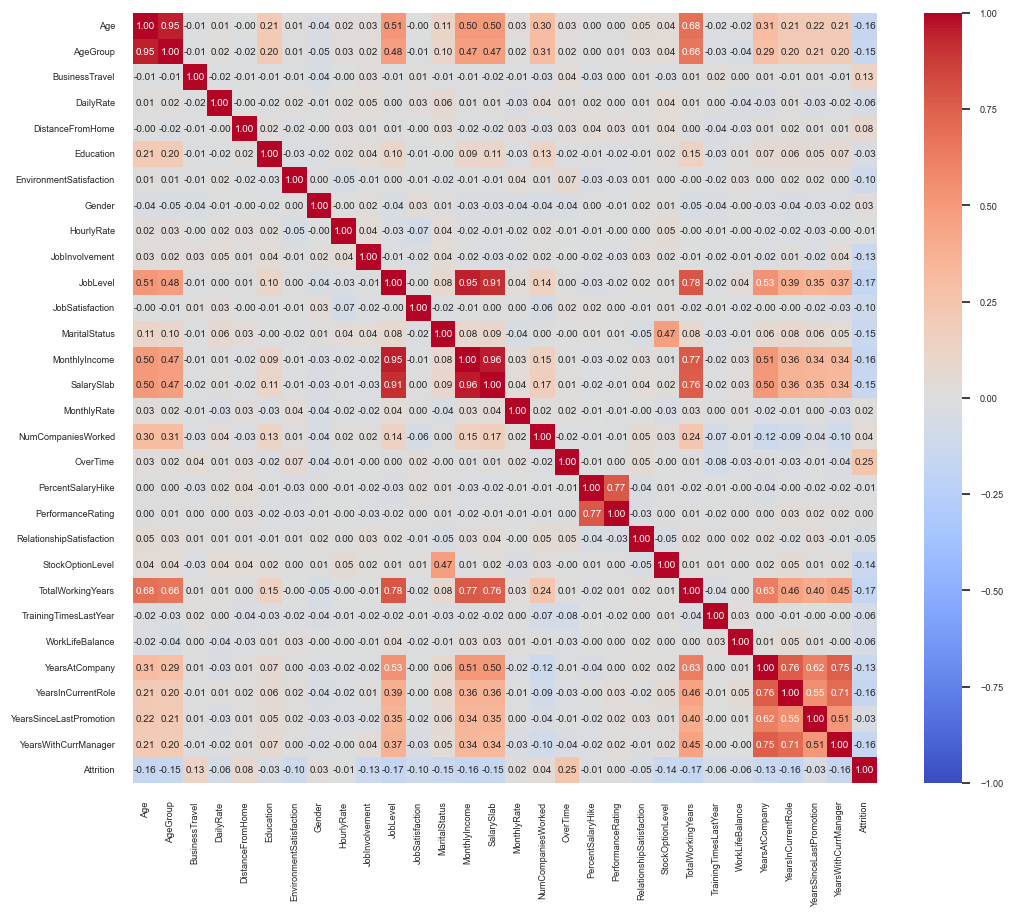

In [134]:
# checking for strongly correlated columns
sns.set(font_scale=0.6)

num_cols = list(df.select_dtypes(include='number').columns.values)

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

plt.figure(figsize=(12, 10))

correlation_matrix = df[num_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')

plt.show()

In [150]:
corr_mean = correlation_matrix.copy()
corr_mean['avg_correlation'] = abs(corr_mean.iloc[:, :].sum() - 1) / (corr_mean.shape[0] - 1)

# moving the avg_corr to the front
cols = corr_mean.columns.tolist()
cols.insert(0, cols.pop(cols.index('avg_correlation')))
corr_mean = corr_mean.reindex(columns=cols)


print('\nThe mean values of correlation between features:')
corr_mean.iloc[:,0].sort_values(ascending=False)


The mean values of correlation between features:


TotalWorkingYears          0.20
JobLevel                   0.19
SalarySlab                 0.18
MonthlyIncome              0.18
YearsAtCompany             0.16
Age                        0.16
AgeGroup                   0.15
YearsInCurrentRole         0.14
YearsWithCurrManager       0.13
YearsSinceLastPromotion    0.12
Attrition                  0.06
MaritalStatus              0.04
Education                  0.04
NumCompaniesWorked         0.04
StockOptionLevel           0.02
PerformanceRating          0.02
PercentSalaryHike          0.02
TrainingTimesLastYear      0.02
Gender                     0.02
JobSatisfaction            0.01
OverTime                   0.01
DistanceFromHome           0.01
RelationshipSatisfaction   0.01
DailyRate                  0.00
EnvironmentSatisfaction    0.00
JobInvolvement             0.00
HourlyRate                 0.00
BusinessTravel             0.00
WorkLifeBalance            0.00
MonthlyRate                0.00
Name: avg_correlation, dtype: float64

In [148]:
mask_high_corr = ((correlation_matrix.values >= 0.4) & (correlation_matrix.values <= 0.9))

high_corr_features = []

for column in correlation_matrix.columns:
    for index_value in correlation_matrix.index:
        if (correlation_matrix.loc[index_value, column] >= 0.4) \
        & (correlation_matrix.loc[index_value, column] <= 0.9):
            if index_value not in high_corr_features:
                high_corr_features.append(index_value)               

# high_corr_features = col_correlated
                
print('Highly correlated features:\n\n{}'.format(high_corr_features))

Highly correlated features:

['JobLevel', 'MonthlyIncome', 'SalarySlab', 'TotalWorkingYears', 'Age', 'AgeGroup', 'YearsAtCompany', 'StockOptionLevel', 'PerformanceRating', 'PercentSalaryHike', 'MaritalStatus', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
